In [8]:
from itertools import product
import numpy as np
import scipy.interpolate 
import os
from pixell import enmap, utils, curvedsky, enplot
import healpy as hp
import matplotlib.pyplot as plt
from cosmikyu import utils as cutils
from cosmikyu import sehgal, stats
from pitas import flipper_tools, config, power
from pitas import modecoupling as mcm
from orphics import maps as omaps

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
input_dir = "/home/dwhan89/scratch/data/sehgal_et_al_sims/cosmo_sim_maps/July2009/output/131020_hybrid_projection"
shape, wcs = enmap.fullsky_geometry(res=0.5*utils.arcmin)
template = enmap.zeros(shape, wcs)
ydel = shape[0] // 9

lmax=10000
l = np.arange(lmax+1)
beam_fwhm = 0.9
l, f = cutils.get_gaussian_beam(l, beam_fwhm)
#bin_edges = flipper_tools.read_bin_edges(os.path.join(config.DEFAULT_RESOURCE_DIR, "BIN_ACTPOL_50_4_SC_low_ell_startAt2"))
bin_edges = np.linspace(0,lmax, 50)
overwrite = False

S10R = sehgal.Sehgal10Reprojected(input_dir, shape, wcs)
maps =  S10R.get_maps(0,0,ret_alm=False)
compts = S10R.get_compts_idxes(trimmed=True)

STAT = stats.STATS("081120_sehgal_fullsky_specs_finer", output_dir=input_dir, overwrite=overwrite)

for i in range(9):
    ysidx = i*ydel
    yeidx = (i+1)*ydel
    nshape, nwcs = template[ysidx:yeidx,:].geometry
    if STAT.has_data("dls_radxrad", i): continue

    print(nshape, nwcs)
    taper = omaps.get_taper(nshape, nwcs, pad_percent=0)[0]
    PITAS = power.PITAS("071120_fullsky_raw_{}_{}_finer".format(ysidx, yeidx), taper, taper, bin_edges, lmax=lmax, overwrite=False)
    #power.PITAS("071120_fullsky_raw_{}_{}_0.9deconv".format(ysidx, yeidx), taper, taper, bin_edges, 
    #            lmax=lmax, transfer=[l, f], overwrite=False)

    cutouts = maps[:,ysidx:yeidx,:].copy()
    cutouts = cutouts*taper
    alms = {}
    for j, compt_idx in enumerate(compts):
        alms[compt_idx] = curvedsky.map2alm(cutouts[j], lmax=lmax)
    del cutouts
    
    for j, key1 in enumerate(compts):
        for k, key2 in enumerate(compts):
            key1 = key1.split("_")[0]
            key2 = key2.split("_")[0]
            key = [key1, key2]
            key.sort()
            key = "dls_"+"x".join(key)
            if STAT.has_data(key, i): continue
            #if key in specs: continue

            cl = hp.alm2cl(alms[key1], alms[key2])
            l = np.arange(len(cl))
            l_fact = l*(l+1)/(2*np.pi)
            dl = l_fact*cl
            lbin, dlbin = PITAS.binner.bin(l, dl)
            dlbin = np.dot(PITAS.mcm_dltt_inv, dlbin)
            STAT.add_data("lbin", 0, lbin)
            STAT.add_data(key, i, dlbin)


    
STAT.get_stats()








loading /home/dwhan89/scratch/data/sehgal_et_al_sims/cosmo_sim_maps/July2009/output/131020_hybrid_projection/kappa_alm_000_000_000.fits
loading /home/dwhan89/scratch/data/sehgal_et_al_sims/cosmo_sim_maps/July2009/output/131020_hybrid_projection/148_ksz_alm_000_000_000.fits
loading /home/dwhan89/scratch/data/sehgal_et_al_sims/cosmo_sim_maps/July2009/output/131020_hybrid_projection/148_tsz_alm_000_000_000.fits
loading /home/dwhan89/scratch/data/sehgal_et_al_sims/cosmo_sim_maps/July2009/output/131020_hybrid_projection/148_ir_pts_alm_000_000_000.fits
adding high flux cats
loading /home/dwhan89/scratch/data/sehgal_et_al_sims/cosmo_sim_maps/July2009/output/131020_hybrid_projection/148_rad_pts_alm_000_000_000.fits
adding high flux cats
[STATS] output_dir is /home/dwhan89/scratch/data/sehgal_et_al_sims/cosmo_sim_maps/July2009/output/131020_hybrid_projection
[STATS] failed to reload data
(2400, 43200) car:{cdelt:[-0.008333,0.008333],crval:[0.004167,0],crpix:[2.16e+04,1.08e+04]}
mcm directory: /

/home/dwhan89/workspace/pitas/pitas/modecoupling.py:11: UserWarning: [pitas/modecoupling] generating mcm
  warnings.warn('[pitas/modecoupling] generating mcm')


finish calculating mcm
mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_0_2400_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_0_2400_finer/curved_full_DLTT_inv.dat
[get_bbl] mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_0_2400_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_0_2400_finer/curved_full_BBL_DLTT.dat
(2400, 43200) car:{cdelt:[-0.008333,0.008333],crval:[0.004167,0],crpix:[2.16e+04,8401]}
mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_2400_4800_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_2400_4800_finer/curved_full_DLTT_inv.dat
failed to load mcm. calculating mcm


/home/dwhan89/workspace/pitas/pitas/modecoupling.py:11: UserWarning: [pitas/modecoupling] generating mcm
  warnings.warn('[pitas/modecoupling] generating mcm')


finish calculating mcm
mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_2400_4800_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_2400_4800_finer/curved_full_DLTT_inv.dat
[get_bbl] mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_2400_4800_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_2400_4800_finer/curved_full_BBL_DLTT.dat
(2400, 43200) car:{cdelt:[-0.008333,0.008333],crval:[0.004167,0],crpix:[2.16e+04,6001]}
mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_4800_7200_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_4800_7200_finer/curved_full_DLTT_inv.dat
failed to load mcm. calculating mcm


/home/dwhan89/workspace/pitas/pitas/modecoupling.py:11: UserWarning: [pitas/modecoupling] generating mcm
  warnings.warn('[pitas/modecoupling] generating mcm')


finish calculating mcm
mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_4800_7200_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_4800_7200_finer/curved_full_DLTT_inv.dat
[get_bbl] mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_4800_7200_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_4800_7200_finer/curved_full_BBL_DLTT.dat
(2400, 43200) car:{cdelt:[-0.008333,0.008333],crval:[0.004167,0],crpix:[2.16e+04,3601]}
mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_7200_9600_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_7200_9600_finer/curved_full_DLTT_inv.dat
failed to load mcm. calculating mcm


/home/dwhan89/workspace/pitas/pitas/modecoupling.py:11: UserWarning: [pitas/modecoupling] generating mcm
  warnings.warn('[pitas/modecoupling] generating mcm')


finish calculating mcm
mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_7200_9600_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_7200_9600_finer/curved_full_DLTT_inv.dat
[get_bbl] mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_7200_9600_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_7200_9600_finer/curved_full_BBL_DLTT.dat
(2400, 43200) car:{cdelt:[-0.008333,0.008333],crval:[0.004167,0],crpix:[2.16e+04,1201]}
mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_9600_12000_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_9600_12000_finer/curved_full_DLTT_inv.dat
failed to load mcm. calculating mcm


/home/dwhan89/workspace/pitas/pitas/modecoupling.py:11: UserWarning: [pitas/modecoupling] generating mcm
  warnings.warn('[pitas/modecoupling] generating mcm')


finish calculating mcm
mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_9600_12000_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_9600_12000_finer/curved_full_DLTT_inv.dat
[get_bbl] mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_9600_12000_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_9600_12000_finer/curved_full_BBL_DLTT.dat
(2400, 43200) car:{cdelt:[-0.008333,0.008333],crval:[0.004167,0],crpix:[2.16e+04,-1199]}
mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_12000_14400_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_12000_14400_finer/curved_full_DLTT_inv.dat
failed to load mcm. calculating mcm


/home/dwhan89/workspace/pitas/pitas/modecoupling.py:11: UserWarning: [pitas/modecoupling] generating mcm
  warnings.warn('[pitas/modecoupling] generating mcm')


finish calculating mcm
mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_12000_14400_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_12000_14400_finer/curved_full_DLTT_inv.dat
[get_bbl] mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_12000_14400_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_12000_14400_finer/curved_full_BBL_DLTT.dat
(2400, 43200) car:{cdelt:[-0.008333,0.008333],crval:[0.004167,0],crpix:[2.16e+04,-3599]}
mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_14400_16800_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_14400_16800_finer/curved_full_DLTT_inv.dat
failed to load mcm. calculating mcm


/home/dwhan89/workspace/pitas/pitas/modecoupling.py:11: UserWarning: [pitas/modecoupling] generating mcm
  warnings.warn('[pitas/modecoupling] generating mcm')


finish calculating mcm
mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_14400_16800_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_14400_16800_finer/curved_full_DLTT_inv.dat
[get_bbl] mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_14400_16800_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_14400_16800_finer/curved_full_BBL_DLTT.dat
(2400, 43200) car:{cdelt:[-0.008333,0.008333],crval:[0.004167,0],crpix:[2.16e+04,-5999]}
mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_16800_19200_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_16800_19200_finer/curved_full_DLTT_inv.dat
failed to load mcm. calculating mcm


/home/dwhan89/workspace/pitas/pitas/modecoupling.py:11: UserWarning: [pitas/modecoupling] generating mcm
  warnings.warn('[pitas/modecoupling] generating mcm')


finish calculating mcm
mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_16800_19200_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_16800_19200_finer/curved_full_DLTT_inv.dat
[get_bbl] mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_16800_19200_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_16800_19200_finer/curved_full_BBL_DLTT.dat
(2400, 43200) car:{cdelt:[-0.008333,0.008333],crval:[0.004167,0],crpix:[2.16e+04,-8399]}
mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_19200_21600_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_19200_21600_finer/curved_full_DLTT_inv.dat
failed to load mcm. calculating mcm


/home/dwhan89/workspace/pitas/pitas/modecoupling.py:11: UserWarning: [pitas/modecoupling] generating mcm
  warnings.warn('[pitas/modecoupling] generating mcm')


finish calculating mcm
mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_19200_21600_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_19200_21600_finer/curved_full_DLTT_inv.dat
[get_bbl] mcm directory: /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_19200_21600_finer
trying to load /home/dwhan89/workspace/pitas/pitas/../output/071120_fullsky_raw_19200_21600_finer/curved_full_BBL_DLTT.dat
[STATS] collecting data
[STATS] saving /home/dwhan89/scratch/data/sehgal_et_al_sims/cosmo_sim_maps/July2009/output/131020_hybrid_projection/stats_081120_sehgal_fullsky_specs_finer.npz from root 0
[STATS] loaded /home/dwhan89/scratch/data/sehgal_et_al_sims/cosmo_sim_maps/July2009/output/131020_hybrid_projection/stats_081120_sehgal_fullsky_specs_finer.npz
calculating stats


/home/dwhan89/workspace/cosmikyu/cosmikyu/stats.py:116: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov = np.cov(data.transpose(), ddof=ddof)
/home/dwhan89/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/dwhan89/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/dwhan89/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/dwhan89/.local/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/dwhan89/.local/lib/python3.7/site-packages/numpy/core/_methods.py:224: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


{'lbin': {'mean': array([ 103. ,  306.5,  510.5,  714.5,  918.5, 1122.5, 1326.5, 1530.5,
         1734.5, 1938.5, 2142.5, 2346.5, 2551. , 2755.5, 2959.5, 3163.5,
         3367.5, 3571.5, 3775.5, 3979.5, 4183.5, 4387.5, 4591.5, 4795.5,
         5000. , 5204.5, 5408.5, 5612.5, 5816.5, 6020.5, 6224.5, 6428.5,
         6632.5, 6836.5, 7040.5, 7244.5, 7449. , 7653.5, 7857.5, 8061.5,
         8265.5, 8469.5, 8673.5, 8877.5, 9081.5, 9285.5, 9489.5, 9693.5,
         9898. ]),
  'cov': array([[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]),
  'corrcoef': array([[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan

In [4]:
maps = S10R.get_maps(0, 0, compts=['tsz'], ret_alm=False)

loading /home/dwhan89/scratch/data/sehgal_et_al_sims/cosmo_sim_maps/July2009/output/131020_hybrid_projection/148_tsz_alm_000_000_000.fits


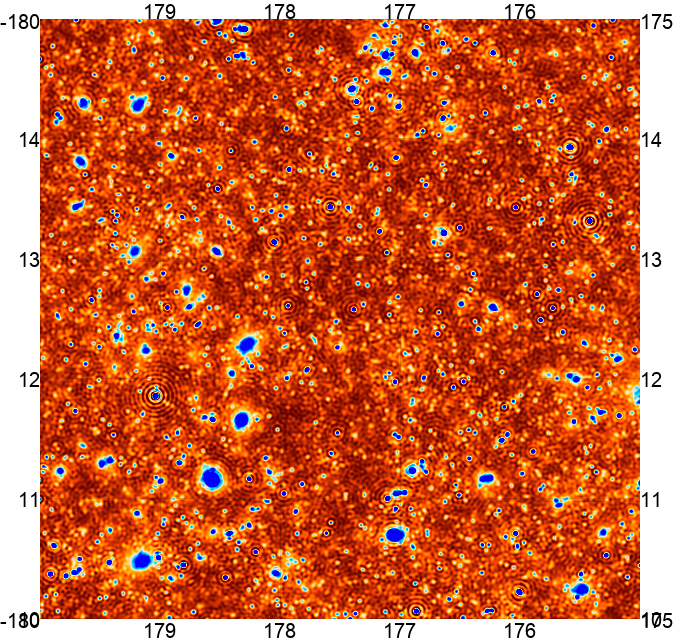

In [7]:
enplot.pshow(maps[0,12000:12000+600, 0:600])

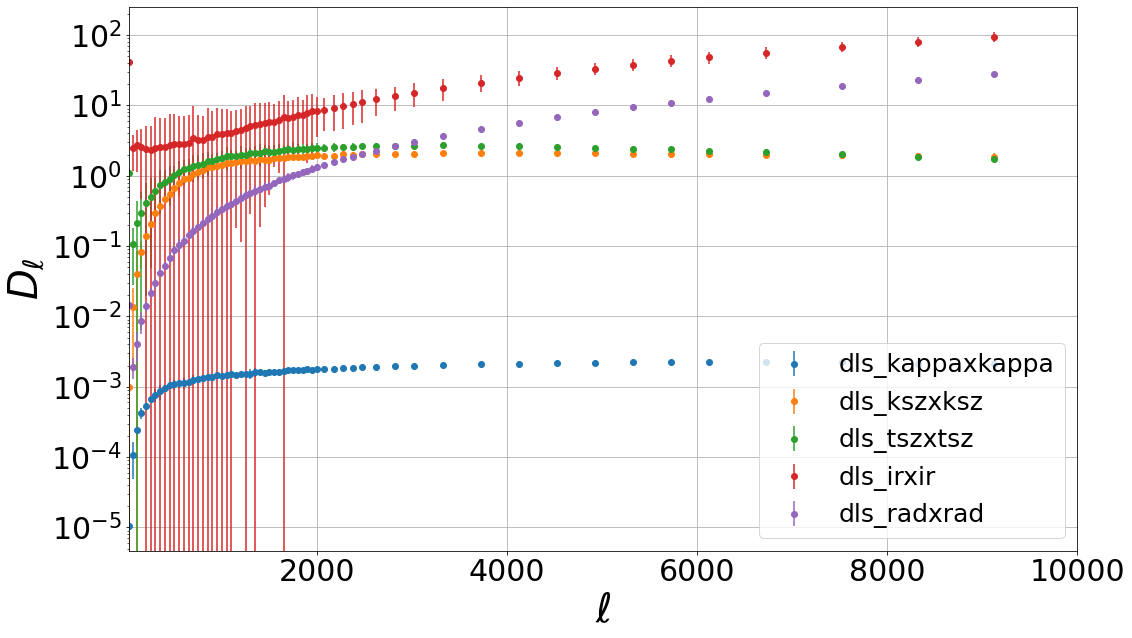

In [4]:
fig = plt.figure(figsize=(17,10))
ax = fig.gca()

lbin = STAT.storage["lbin"][0]
for j, key1 in enumerate(compts):
    for k, key2 in enumerate(compts):
        if j != k: continue
        key1 = key1.split("_")[0]
        key2 = key2.split("_")[0]
        key = [key1, key2]
        key.sort()
        key = "dls_"+"x".join(key)
        dlbin = STAT.stats[key]["mean"]
        std = STAT.stats[key]["std"]*np.sqrt(8)
        plt.errorbar(lbin, dlbin, std, label=key, marker="o", ls="")
plt.xlim(20, lmax)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.tick_params(axis='both', which='minor', labelsize=30)
plt.ylabel(r"$D_\ell$", fontsize=40)
plt.xlabel(r"$\ell$", fontsize=40)
plt.legend(fontsize=25)
#plt.xscale("log")
plt.yscale("log")
plt.grid("on")
plt.show()

In [ ]:
fig = plt.figure(figsize=(17,10))
ax = fig.gca()

lbin = STAT.storage["lbin"][0]
for j, key1 in enumerate(compts):
    for k, key2 in enumerate(compts):
        if j == k: continue
        key1 = key1.split("_")[0]
        key2 = key2.split("_")[0]
        key = [key1, key2]
        key.sort()
        key = "dls_"+"x".join(key)
        dlbin = STAT.stats[key]["mean"]
        std = STAT.stats[key]["std"]*np.sqrt(8)
        plt.errorbar(lbin, dlbin, std, label=key)
plt.xlim(20, lmax)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.tick_params(axis='both', which='minor', labelsize=30)
plt.ylabel(r"$D_\ell$", fontsize=40)
plt.xlabel(r"$\ell$", fontsize=40)
plt.legend(fontsize=25)
plt.xscale("log")
plt.yscale("log")
plt.grid("on")
plt.show()

In [ ]:
    
l, f = cutils.get_gaussian_beam(l, beam_fwhm)

BINNER = mcm.PITAS_BINNER(bin_edges, lmax=lmax)

specs = S10R.get_specs(overwrite=False)
specs_binned = {}
for key in specs:
    if key == "l": continue
    lbin, dlbin = BINNER.bin(specs["l"], specs[key])
    specs_binned["lbin"] = lbin
    specs_binned[key] = dlbin

In [6]:

S10R.get_correlation()


/home/dwhan89/workspace/cosmikyu/cosmikyu/sehgal.py:149: RuntimeWarning: invalid value encountered in true_divide
  rho = dlx/np.sqrt(dl1*dl2)


{'rho_kappaxkappa': array([0., 1., 1., ..., 1., 1., 1.]),
 'rho_kappaxksz': array([ 0.        ,  0.88219114,  0.99377048, ..., -0.02418855,
        -0.01275587,  0.03423981]),
 'rho_kappaxtsz': array([ 0.        , -0.37337977,  0.99377048, ..., -0.50627754,
        -0.50472382, -0.50029681]),
 'rho_irxkappa': array([0.        , 0.97016468, 0.99377038, ..., 0.27627609, 0.29426903,
        0.27149995]),
 'rho_kappaxrad': array([ 0.        ,  0.56027499, -0.99375998, ...,  0.06383775,
         0.02196555,  0.08476573]),
 'rho_kszxksz': array([0., 1., 1., ..., 1., 1., 1.]),
 'rho_kszxtsz': array([ 0.        , -0.4601228 ,  1.        , ...,  0.00616146,
        -0.00546517, -0.01264021]),
 'rho_irxksz': array([ 0.        ,  0.81165666,  1.        , ..., -0.00996595,
        -0.01562114,  0.0166691 ]),
 'rho_kszxrad': array([ 0.        ,  0.26297362, -0.99999998, ..., -0.01666168,
        -0.01549945, -0.02624154]),
 'rho_tszxtsz': array([0., 1., 1., ..., 1., 1., 1.]),
 'rho_irxtsz': array([

(1e-05, 1000.0)

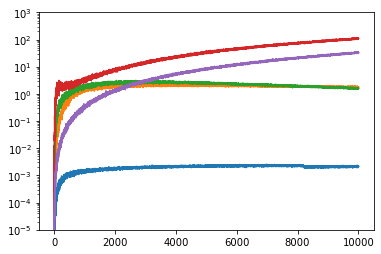

In [7]:
compt_idx = S10R.get_compts_idxes(True)
specs = S10R.get_specs()
for key1 in compt_idx:
    for key2 in compt_idx:
        if key1 != key2: continue
        key = [key1, key2]
        key.sort()
        key = "dls_"+"x".join(key)
        plt.plot(specs["l"], specs[key])
plt.yscale("log")
plt.ylim(1e-5,1e3)
        


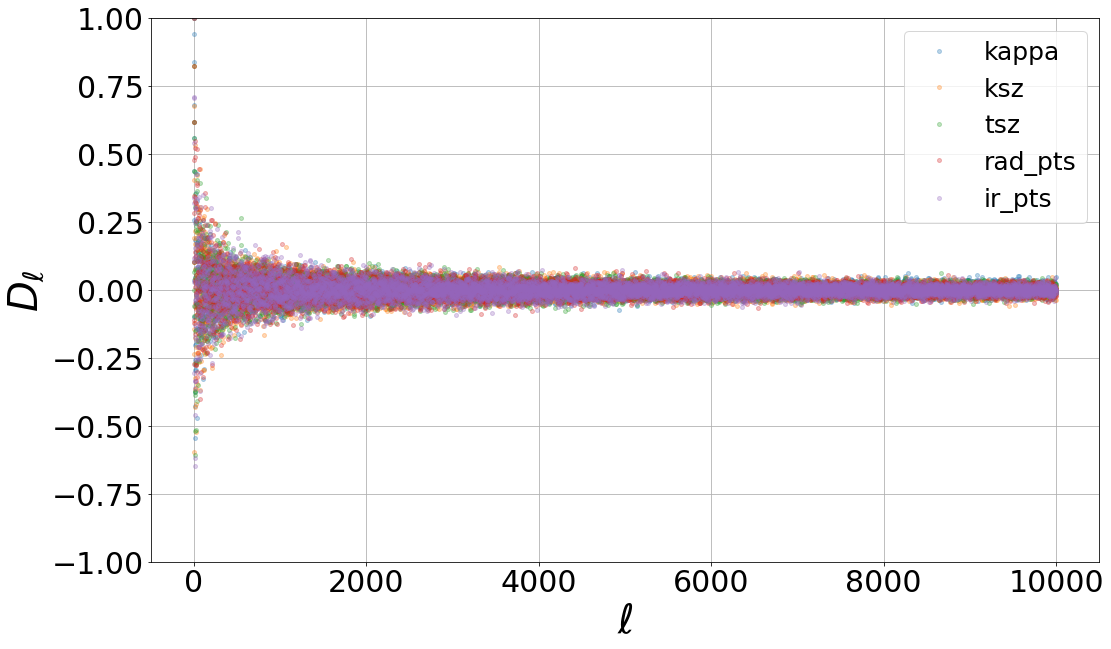

In [65]:
fig = plt.figure(figsize=(17,10))
ax = fig.gca()
compts = ["kappa", "ksz", "tsz", "rad_pts", "ir_pts"]
for i, key in enumerate(compts[:]):
    cl1 = hp.alm2cl(raw_output[1][i].copy())
    cl2 = hp.alm2cl(rotated_output[1][i].copy())
    clx = hp.alm2cl(raw_output[1][i].copy(), rotated_output[1][i].copy())
    rho = clx/np.sqrt(cl1*cl2)
    plt.plot(l, rho, alpha=0.3, label=key, ls="", marker="o", markersize=4)
    

ax.tick_params(axis='both', which='major', labelsize=30)
ax.tick_params(axis='both', which='minor', labelsize=30)
plt.ylabel(r"$D_\ell$", fontsize=40)
plt.xlabel(r"$\ell$", fontsize=40)
plt.legend(fontsize=25)
plt.ylim(-1,1)
#plt.yscale("log")
plt.grid("on")
plt.show()

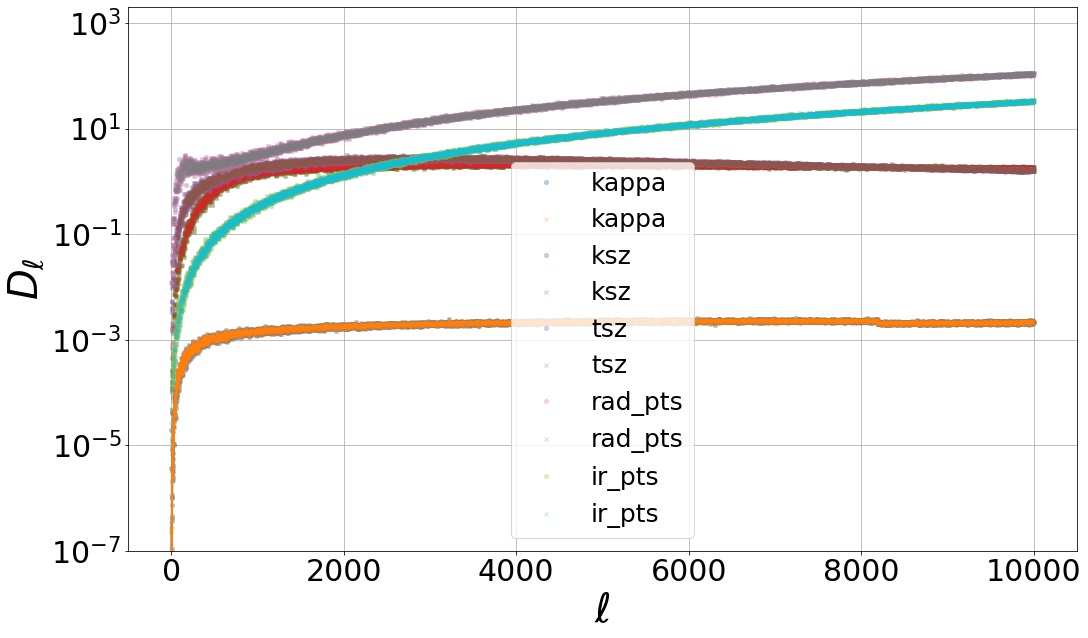

In [66]:
fig = plt.figure(figsize=(17,10))
ax = fig.gca()
compts = ["kappa", "ksz", "tsz", "rad_pts", "ir_pts"]
for i, key in enumerate(compts[:]):
    cl = hp.alm2cl(raw_output[1][i].copy())
    l = np.arange(len(cl))
    dls = l*(l+1)/2/np.pi*cl
    plt.plot(l, dls, alpha=0.3, label=key, ls="", marker="o", markersize=4)
    
    cl = hp.alm2cl(rotated_output[1][i].copy())
    l = np.arange(len(cl))
    dls = l*(l+1)/2/np.pi*cl
    plt.plot(l, dls, alpha=0.3, label=key, ls="", marker="x", markersize=4)
plt.plot(l, clkk_o*l*(l+1)/2/np.pi)
plt.plot(l, clkk_r*l*(l+1)/2/np.pi)

ax.tick_params(axis='both', which='major', labelsize=30)
ax.tick_params(axis='both', which='minor', labelsize=30)
plt.ylabel(r"$D_\ell$", fontsize=40)
plt.xlabel(r"$\ell$", fontsize=40)
plt.legend(fontsize=25)
plt.ylim(1e-7,2e3)
plt.yscale("log")
plt.grid("on")
plt.show()